In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('../data/SWaT_dataset_Jul 19 v2.xlsx')
df.head()

,GMT +0,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,AIT 202,AIT 203,...,LSH 601,LSH 602,LSH 603,LSL 601,LSL 602,LSL 603,P6 STATE,P601 Status,P602 Status,P603 Status
0,2019-07-20T08:39:59.004013Z,4.323736,492.896881,2,2,2,1,131.408615,9.313829,257.933868,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
1,2019-07-20T08:39:58.0050048Z,4.323736,492.465100,2,2,2,1,131.408615,9.316713,257.703156,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
2,2019-07-20T08:39:57.0050048Z,4.303558,492.308100,2,2,2,1,131.408615,9.317354,257.703156,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
3,2019-07-20T08:39:56.0050048Z,4.253915,491.405273,2,2,2,1,131.408615,9.317354,257.703156,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
4,2019-07-20T08:39:55.001007Z,4.200429,491.169769,2,2,2,1,131.408615,9.319918,257.703156,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1


In [7]:
df.shape

(14996, 78)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14996 entries, 0 to 14995
Data columns (total 78 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GMT +0       14996 non-null  object 
 1   FIT 101      14996 non-null  float64
 2   LIT 101      14996 non-null  float64
 3   MV 101       14996 non-null  int64  
 4   P1_STATE     14996 non-null  int64  
 5   P101 Status  14996 non-null  int64  
 6   P102 Status  14996 non-null  int64  
 7   AIT 201      14996 non-null  float64
 8   AIT 202      14996 non-null  float64
 9   AIT 203      14996 non-null  float64
 10  FIT 201      14996 non-null  float64
 11  LS 201       14996 non-null  object 
 12  LS 202       14996 non-null  object 
 13  LSL 203      14996 non-null  object 
 14  LSLL 203     14996 non-null  object 
 15  MV201        14996 non-null  int64  
 16  P2_STATE     14996 non-null  int64  
 17  P201 Status  14996 non-null  int64  
 18  P202 Status  14996 non-null  int64  
 19  P203

In [19]:
df.isna().sum()

GMT +0         0
FIT 101        0
LIT 101        0
MV 101         0
P1_STATE       0
              ..
LSL 603        0
P6 STATE       0
P601 Status    0
P602 Status    0
P603 Status    0
Length: 78, dtype: int64

In [26]:
df[['LIT 101', 'AIT 302', 'AIT 302', 'LIT 301']].describe()

,LIT 101,AIT 302,AIT 302,LIT 301
count,14996.000000,14996.000000,14996.000000,14996.000000
mean,733.960251,283.695239,283.695239,946.637019
std,110.960185,8.547831,8.547831,92.168566
min,491.169769,256.431274,256.431274,730.702100
25%,640.595184,277.303284,277.303284,858.103317
50%,819.636841,281.656952,281.656952,981.158700
75%,820.971436,292.285034,292.285034,1009.156310
max,825.092957,299.020416,299.020416,1112.775630


In [31]:
def plot_time_series(df, col, title):
    plt.figure(figsize=(20, 5))
    plt.plot(df[col])
    plt.title(col)
    plt.show()

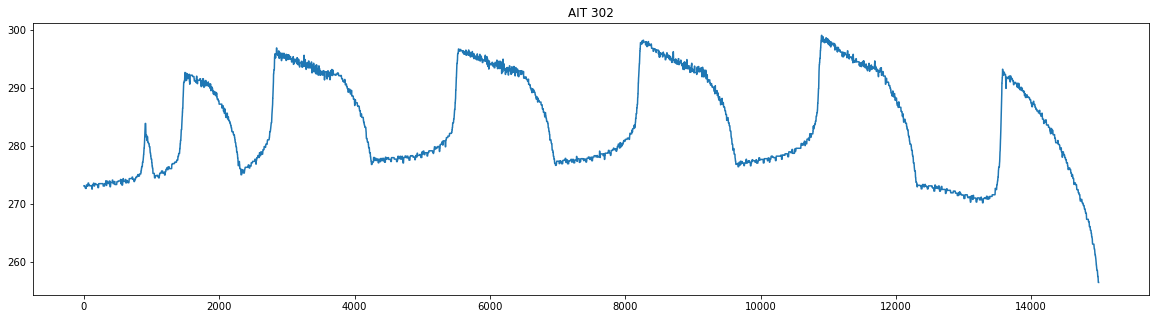

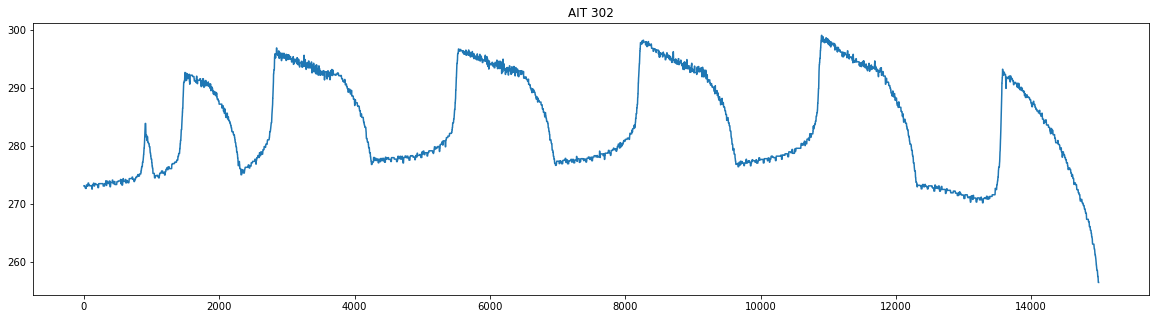

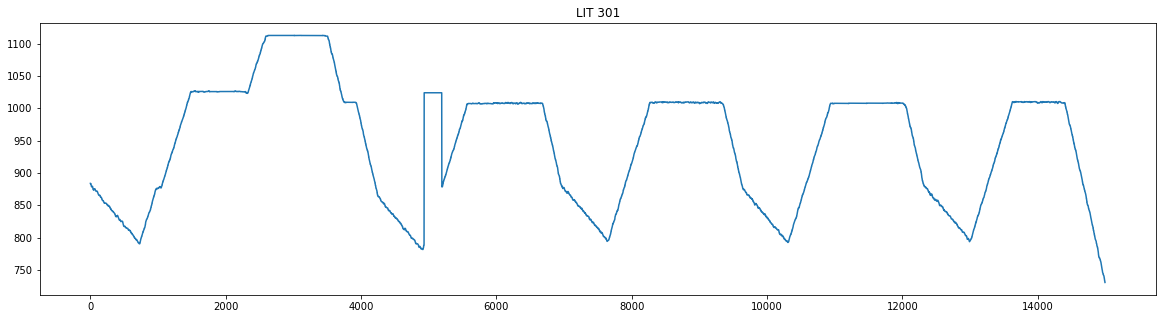

In [32]:
cols = ['AIT 302', 'AIT 302', 'LIT 301']
for col in cols:
    plot_time_series(df, col, 'GMT +0')

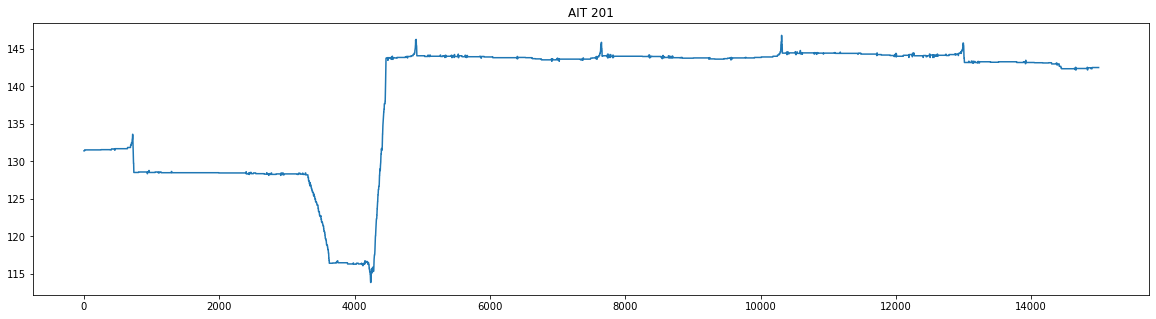

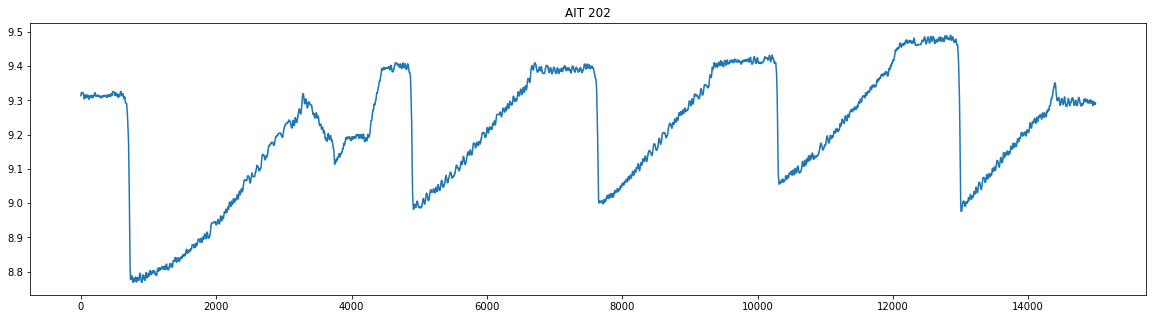

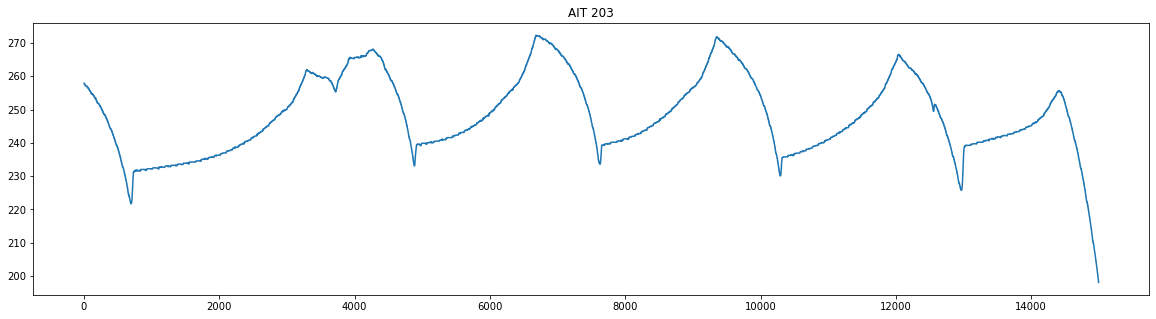

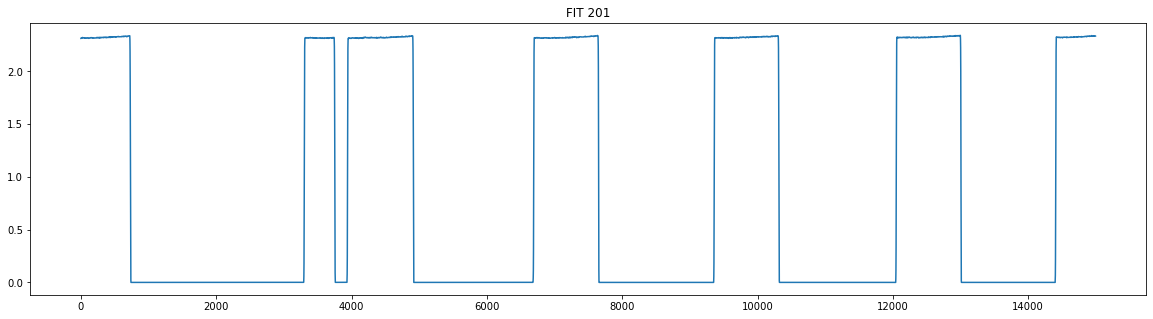

In [33]:
cols = ['AIT 201', 'AIT 202', 'AIT 203', 'FIT 201',]
for col in cols:
    plot_time_series(df, col, 'GMT +0')

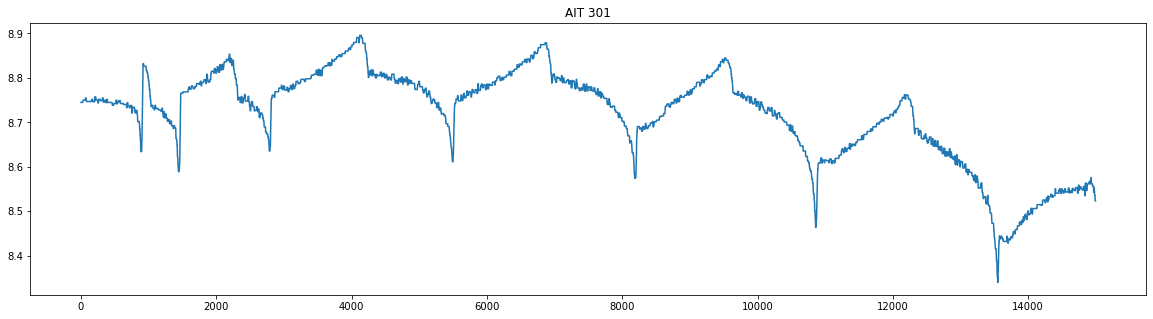

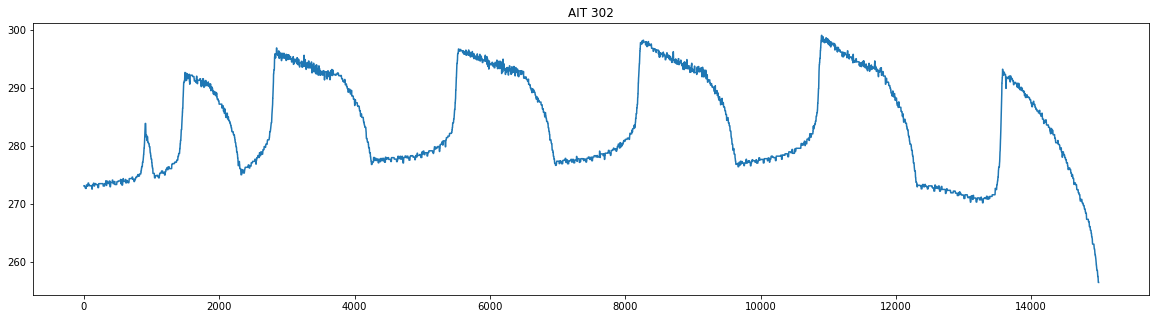

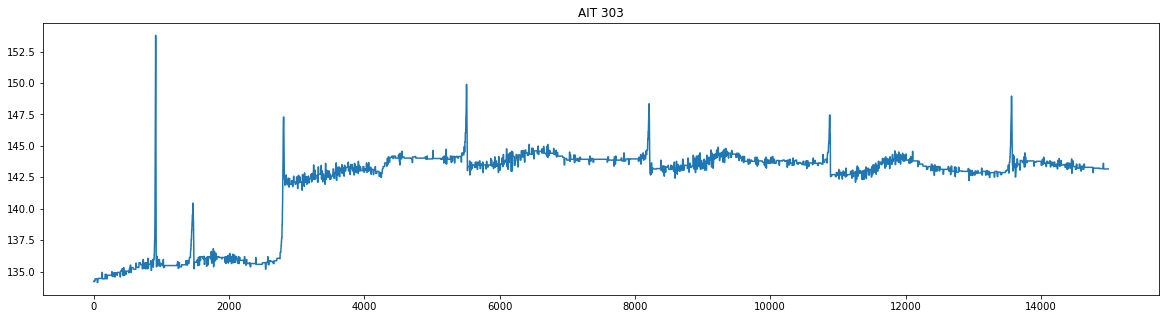

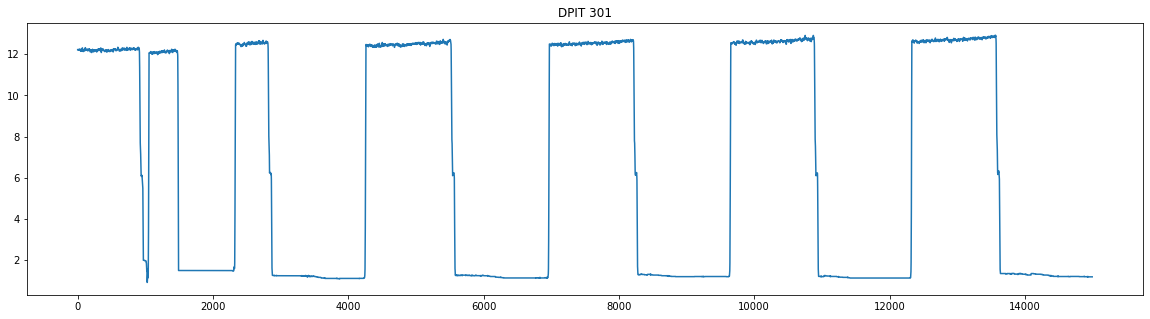

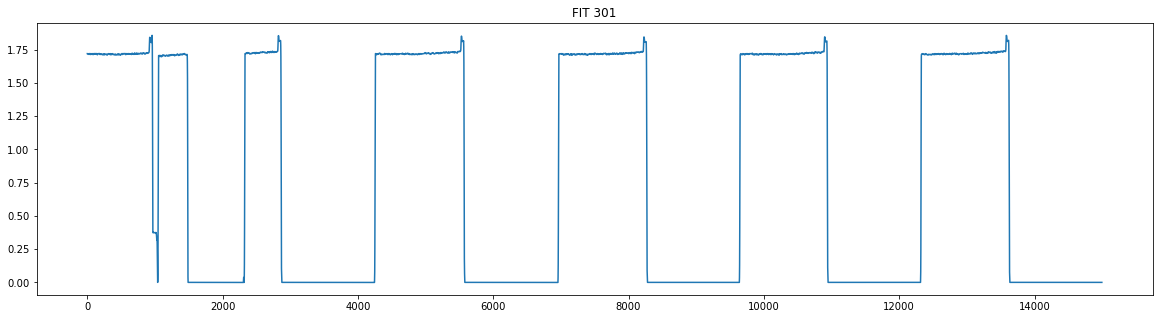

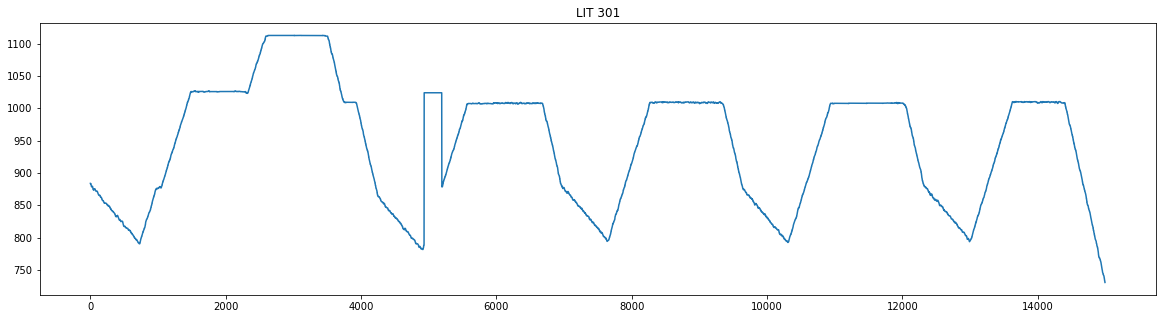

In [34]:
cols = ['AIT 301', 'AIT 302', 'AIT 303', 'DPIT 301', 'FIT 301', 'LIT 301']
for col in cols:
    plot_time_series(df, col, 'GMT +0')

In [40]:
df['LS 201'].value_counts()

Inactive    14996
Name: LS 201, dtype: int64

In [41]:
df['LS 202'].value_counts()

Inactive    14996
Name: LS 202, dtype: int64

In [42]:
df['LSL 203'].value_counts()

Inactive    14996
Name: LSL 203, dtype: int64

In [43]:
df['LSLL 203'].value_counts()

Inactive    14996
Name: LSLL 203, dtype: int64

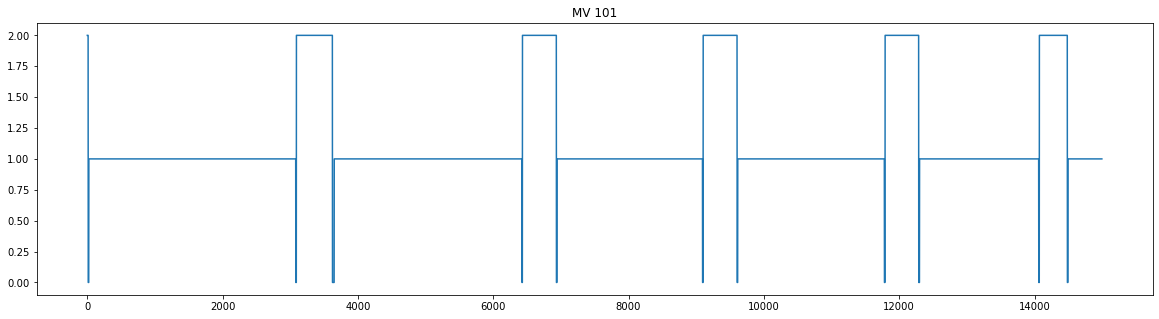

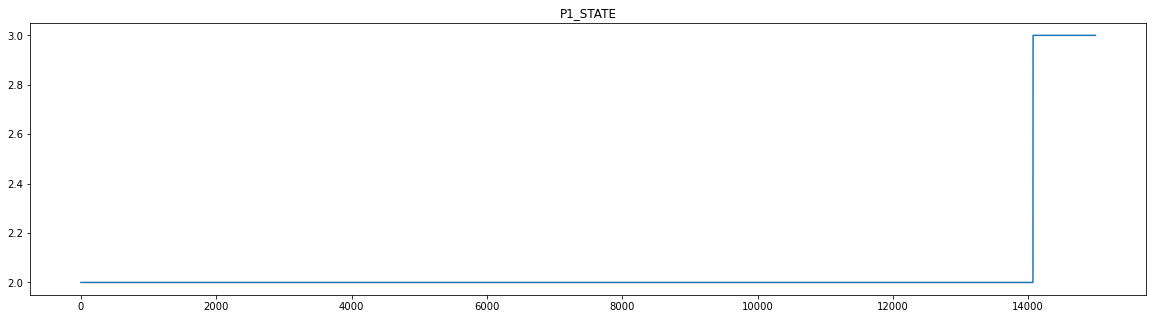

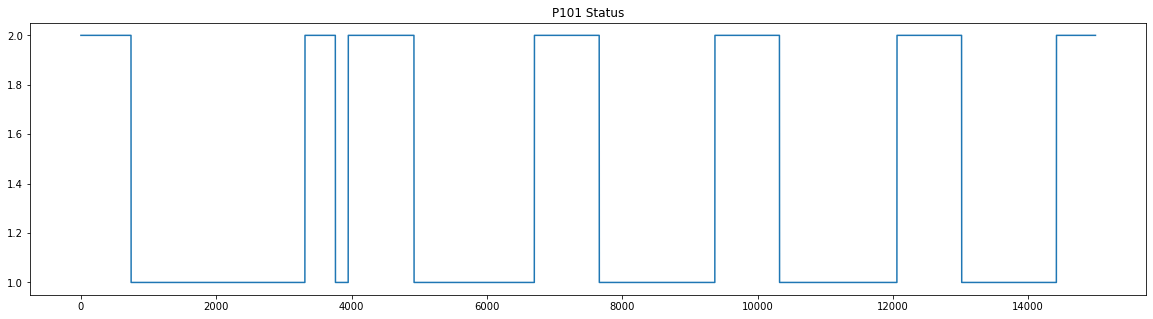

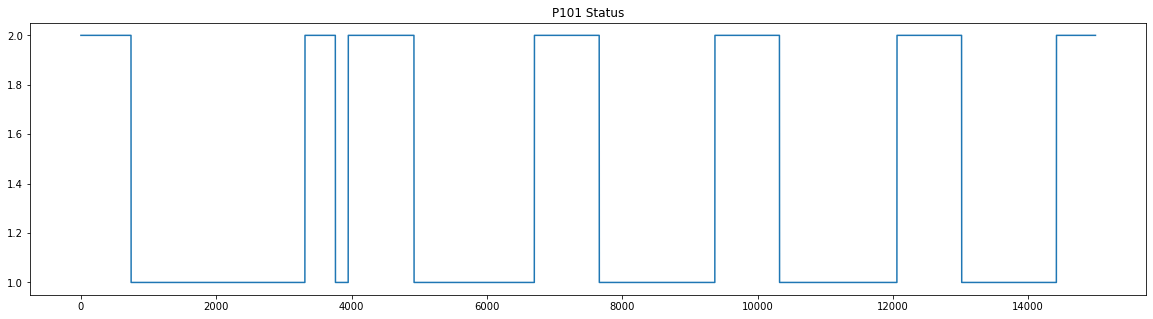

In [46]:
cols = ['MV 101', 'P1_STATE', 'P101 Status', 'P101 Status']
for col in cols:
    plot_time_series(df, col, 'GMT +0')

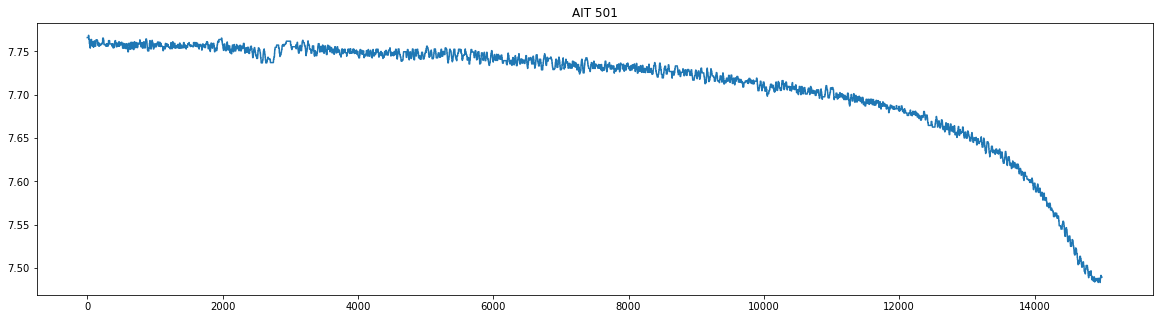

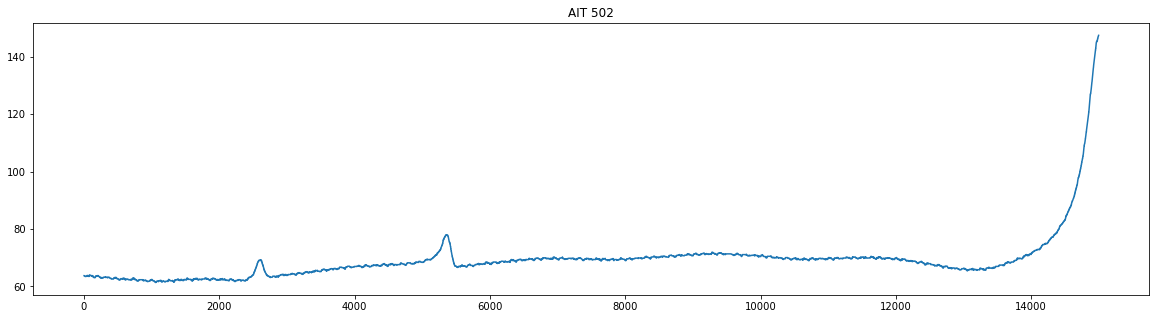

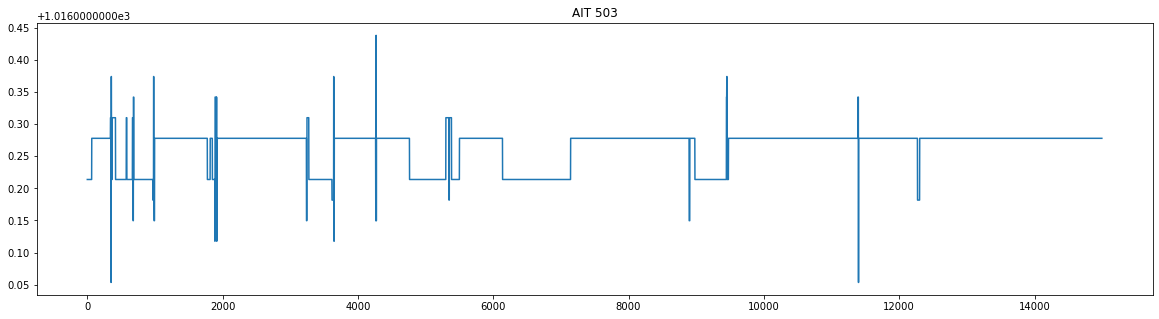

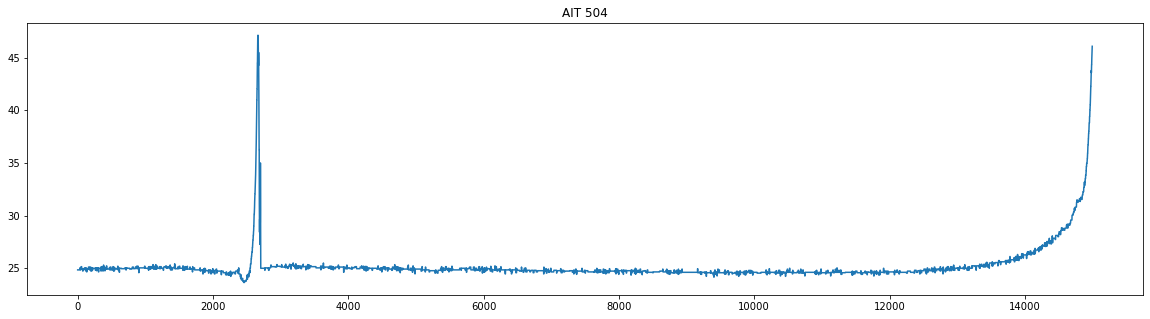

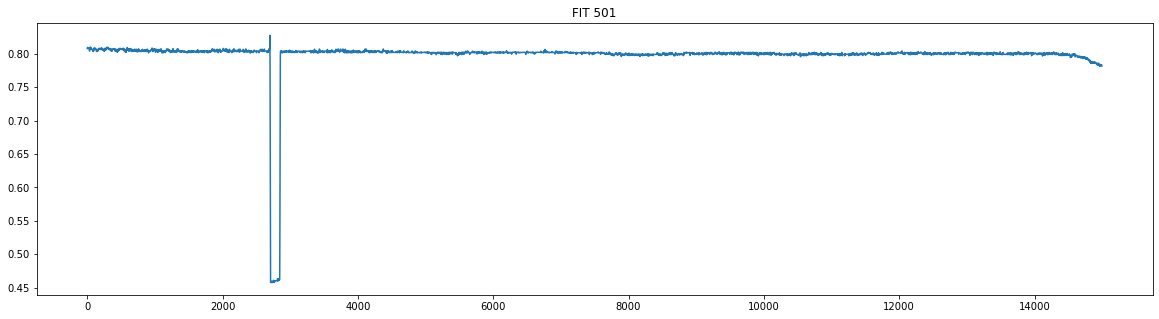

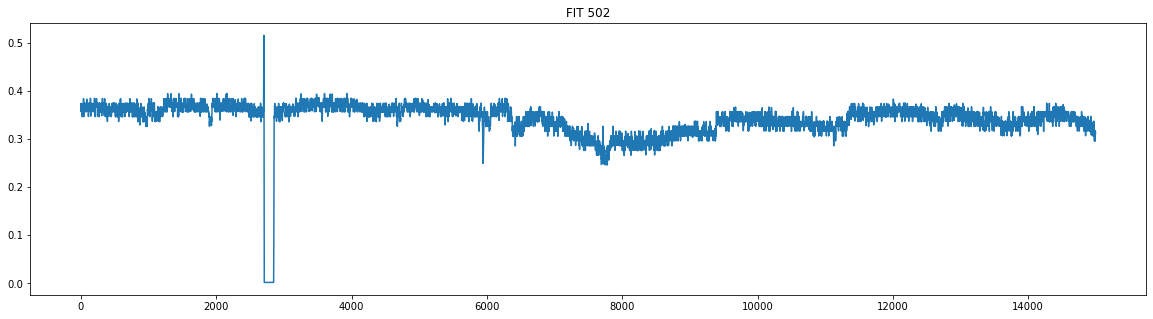

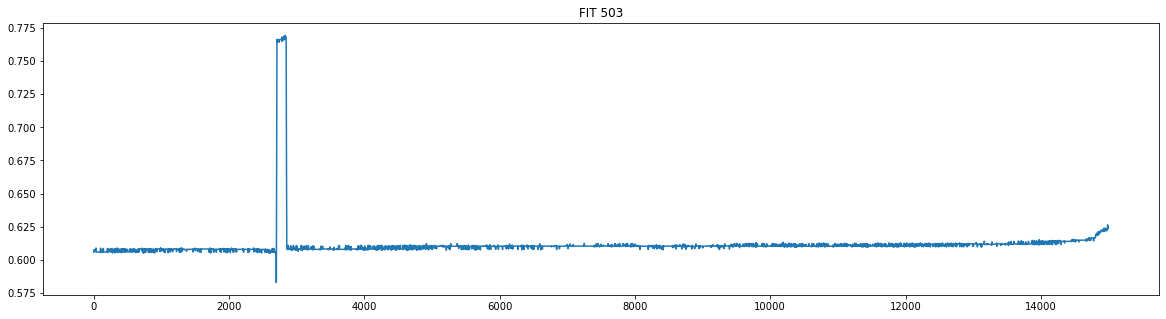

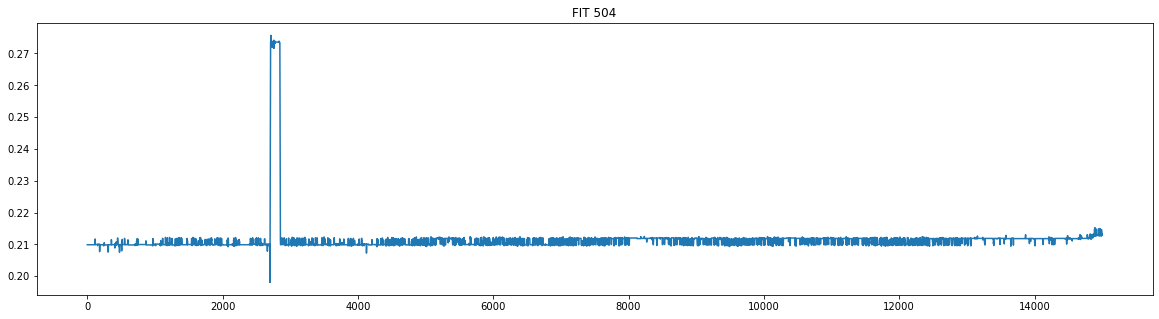

In [47]:
cols = [ 'AIT 501', 'AIT 502', 'AIT 503', 'AIT 504', 'FIT 501', 'FIT 502', 'FIT 503', 'FIT 504' ]
for col in cols:
    plot_time_series(df, col, 'GMT +0')

## Dimensionality Reduction

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

cols = ['AIT 201', 'AIT 202', 'AIT 203', 'FIT 201', 'AIT 301', 'AIT 302', 'AIT 303', 'DPIT 301', 'FIT 301', 'LIT 301', 'AIT 501', 'AIT 502', 'AIT 503', 'AIT 504', 'FIT 501', 'FIT 502', 'FIT 503', 'FIT 504']

In [18]:
pca = PCA(n_components=2)

scaler = MinMaxScaler()
scaled = scaler.fit(df[cols]).transform(df[cols])

In [21]:
scaled = pca.fit_transform(scaled)
res = pca.fit_transform(df[cols])

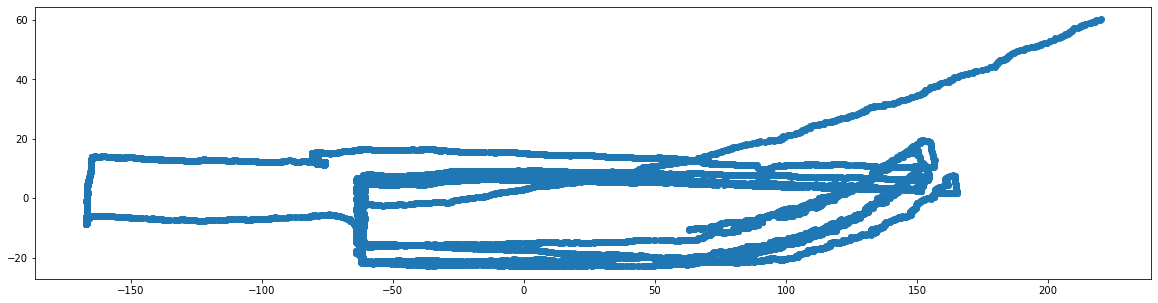

In [22]:
plt.figure(figsize=(20, 5))
plt.scatter(res[:, 0], res[:, 1])
plt.show()


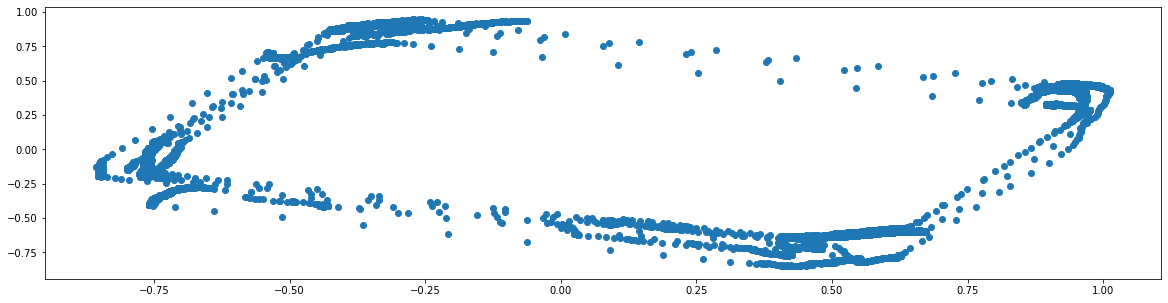

In [23]:
plt.figure(figsize=(20, 5))
plt.scatter(scaled[:, 0], scaled[:, 1])
plt.show()
